In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(ride_data_df,city_data_df, how='outer', on='city')

# Display the data table for preview
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
# Obtain the x and y coordinates for each of the three city types
urb_city = combined_data_df[combined_data_df["type"] == "Urban"]
rural_city = combined_data_df[combined_data_df["type"] == "Rural"]
suburb_city = combined_data_df[combined_data_df["type"] == "Suburban"]

## Bubble Plot of Ride Sharing Data

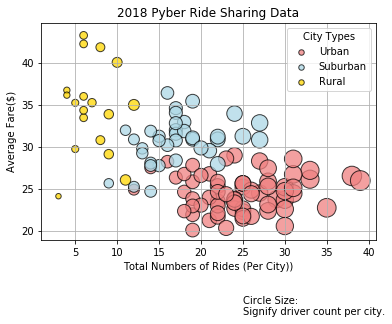

In [8]:
# Urban calculations of Average Fare, Total Rides and Total Drivers for Urban cities
fare_urb_city_avg = urb_city.groupby(['city'])['fare'].mean()
rides_urb_city_total = urb_city.groupby(['city']).count()['ride_id']
drivers_urb_city_total = urb_city.groupby(['city'])['driver_count'].value_counts()

# Suburban calculations of Average Fare, Total Rides and Total Drivers for Suburban cities
fare_suburb_city_avg = suburb_city.groupby(['city'])['fare'].mean()
rides_suburb_city_total = suburb_city.groupby(['city']).count()['ride_id']
drivers_suburb_city_total = suburb_city.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Rural cities
fare_rural_city_avg = rural_city.groupby(['city'])['fare'].mean()
rides_rural_city_total = rural_city.groupby(['city']).count()['ride_id']
drivers_rural_city_total = rural_city.groupby(['city'])['driver_count'].value_counts()

# Scatter plots for all city types
plt.scatter(rides_urb_city_total, fare_urb_city_avg,s=drivers_urb_city_total*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.75, label="Urban")

plt.scatter(rides_suburb_city_total, fare_suburb_city_avg,s=drivers_suburb_city_total*10,
            marker ='o', facecolors ="lightblue", edgecolors='black',alpha = 0.75, label="Suburban")

plt.scatter(rides_rural_city_total, fare_rural_city_avg,s=drivers_rural_city_total*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.75, label="Rural")

# Chart legend
legend = plt.legend(title="City Types", loc="upper right")

legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Explaination of circle size
plt.text(25,10,"Circle Size: \nSignify driver count per city.", fontsize = 10)
# Chart Details
plt.title("2018 Pyber Ride Sharing Data")
# x label
plt.xlabel("Total Numbers of Rides (Per City))")
# y label
plt.ylabel("Average Fare($)")
# Grid Type
plt.grid()
# Image of the chart and print to screen
plt.savefig("../images/Ride Sharing.png")
plt.show()

## Total Fares by City Type

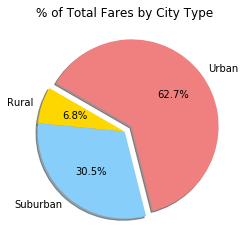

In [4]:
# Calculate Type Percents
type_group = combined_data_df.groupby(['type'])
fare_sum = type_group['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../images/FaresbyCityType.png")

# Show Figure
plt.show()


## Total Rides by City Type

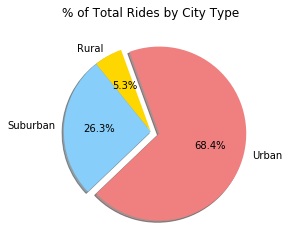

In [7]:
# Calculate Ride Percents
rides_count = combined_data_df.groupby(['type'])['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=110)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../images/RidesbyCityType.png")

# Show Figure
plt.show()


## Total Drivers by City Type

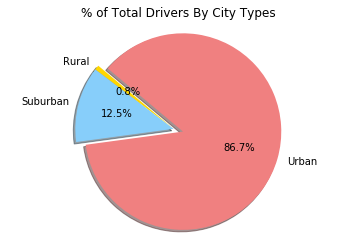

In [6]:
# Calculate Total Drivers by City Type
total_drivers = combined_data_df.groupby(['type'])['driver_count'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("../images/% of Total Drivers By City Types.png")
plt.show()